<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [76]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta
import os 
import re

from functools import reduce
from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Customer Analysis

In [6]:
os.listdir()

['.config',
 'online_retail_II.xlsx',
 'bz_data_analyis.csv',
 '1_customers_dataset.csv',
 'scanner_data.csv',
 'test.csv',
 'sales.csv',
 'sales_data_with_stores.csv',
 'mall_customers.csv',
 'mock_sales_data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sales_vs_discount.csv',
 '1_orders_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sample-sales-data.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'groceries.csv',
 'match_result_test.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'online_retail.xlsx',
 '1_order_payments_dataset.csv',
 'ecommerce-data.csv',
 'sample_data']

In [8]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.columns = ['_'.join(re.split('(?=[A-Z][a-z])', a[0].lower() + a[1:])).lower() for a in df.columns]
df.head()

,customerid,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streamingtv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streamingtv        7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

In [15]:
no_charges = df[['total_charges']].assign(x = [np.where(re.search('\d{1,}', a), 'o', 'x') for a in df['total_charges']])
no_charges = no_charges[no_charges['x'] == 'x']
df = df.drop(index = no_charges.index)
df['total_charges'] = df['total_charges'].astype(float)

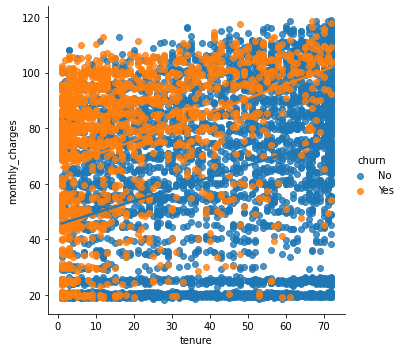

In [22]:
sns.lmplot(data = df, x = 'tenure', y = 'monthly_charges', hue = 'churn')

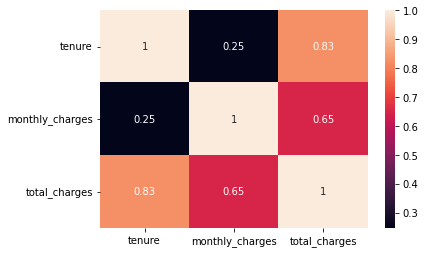

In [19]:
sns.heatmap(df[['tenure', 'monthly_charges', 'total_charges']].corr(), annot = True)

In [23]:
df.head()

,customerid,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streamingtv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


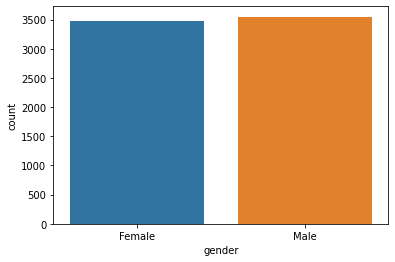

In [26]:
sns.countplot(data = df, x = 'gender')

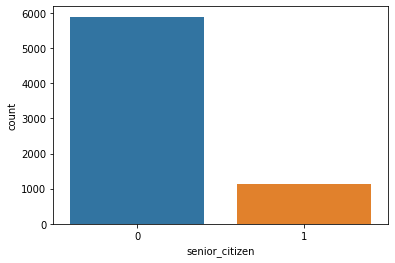

In [27]:
sns.countplot(data = df, x = 'senior_citizen')

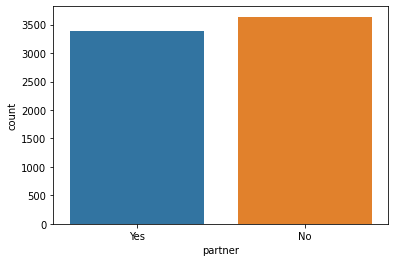

In [28]:
sns.countplot(data = df, x = 'partner')

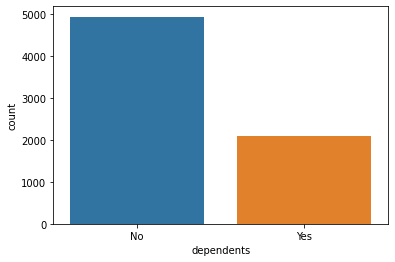

In [30]:
sns.countplot(data = df, x = 'dependents')

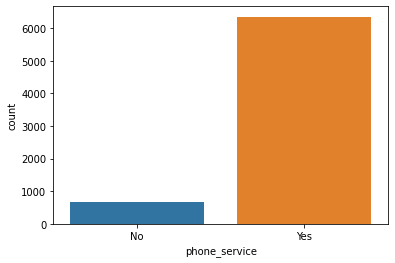

In [31]:
sns.countplot(data = df, x = 'phone_service')

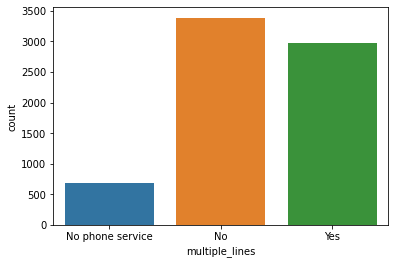

In [33]:
sns.countplot(data = df, x = 'multiple_lines')

In [37]:
df[(df['multiple_lines'] == 'No phone service') | (df['phone_service'] == 'No')][['multiple_lines', 'phone_service']].value_counts()

multiple_lines    phone_service
No phone service  No               680
dtype: int64

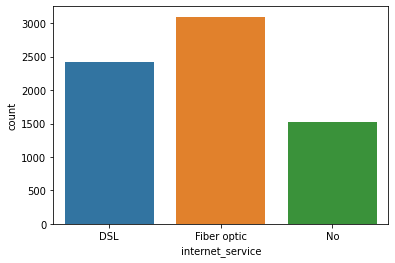

In [38]:
sns.countplot(data = df, x = 'internet_service')

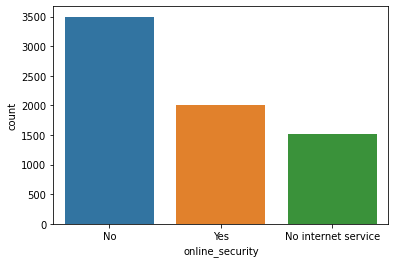

In [39]:
sns.countplot(data = df, x = 'online_security')

In [40]:
df[(df['online_security'] == 'No internet service') | (df['internet_service'] == 'No')][['online_security', 'internet_service']].value_counts()

online_security      internet_service
No internet service  No                  1520
dtype: int64

In [52]:
cnt_internet = df[~(df['online_security'] == 'No internet service') & ~(df['internet_service'] == 'No')][['online_security', 'internet_service']].value_counts().reset_index()
cnt_internet.columns = ['online_security', 'internet_service', 'cnt']
cnt_internet.assign(ratio = [round(a/cnt_internet['cnt'].sum()*100,2) for a in cnt_internet['cnt']])

,online_security,internet_service,cnt,ratio
0,No,Fiber optic,2257,40.95
1,No,DSL,1240,22.50
2,Yes,DSL,1176,21.34
3,Yes,Fiber optic,839,15.22


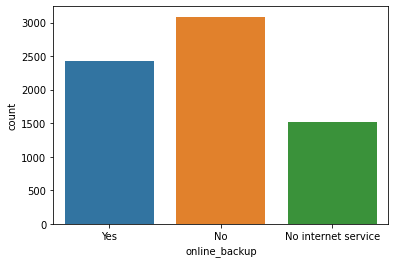

In [53]:
sns.countplot(data = df, x = 'online_backup')

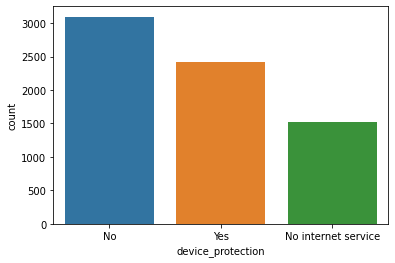

In [54]:
sns.countplot(data = df, x = 'device_protection')

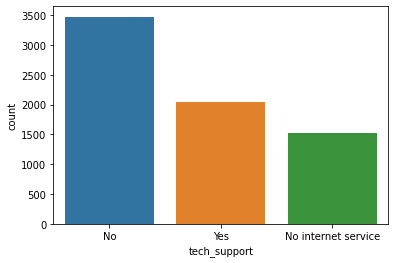

In [55]:
sns.countplot(data = df, x = 'tech_support')

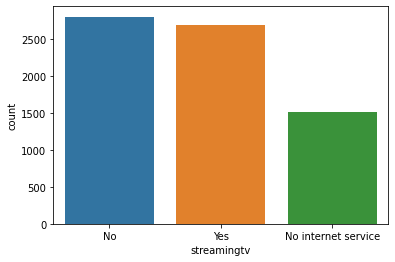

In [56]:
sns.countplot(data = df, x = 'streamingtv')

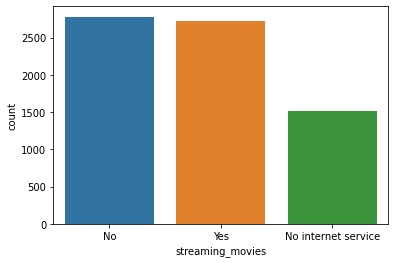

In [57]:
sns.countplot(data = df, x = 'streaming_movies')

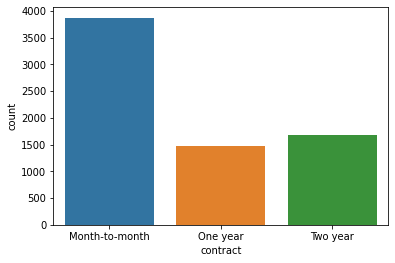

In [58]:
sns.countplot(data = df, x = 'contract')

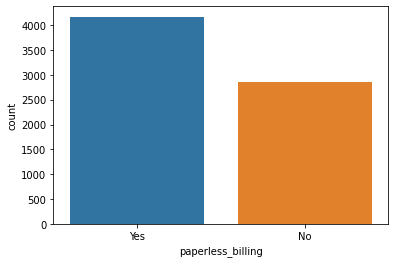

In [59]:
sns.countplot(data = df, x= 'paperless_billing')

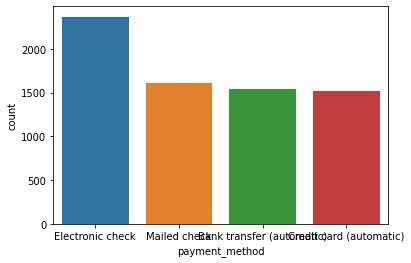

In [60]:
sns.countplot(data = df, x = 'payment_method')

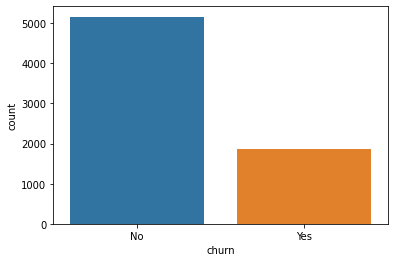

In [61]:
sns.countplot(data = df, x = 'churn')

In [62]:
col_dummy = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streamingtv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method']
col_num = ['tenure', 'monthly_charges', 'total_charges']

In [67]:
df_dummy = pd.get_dummies(df[col_dummy])

In [82]:
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(df[col_num]), columns = col_num)
df_num.head()

,tenure,monthly_charges,total_charges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457


In [89]:
x = pd.concat([df_dummy, df[col_num]], axis = 1)
x.head()

,senior_citizen,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,...,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,tenure,monthly_charges,total_charges
0,0,1,0,0,1,1,0,1,0,0,...,0,0,1,0,0,1,0,1,29.85,29.85
1,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,0,1,34,56.95,1889.50
2,0,0,1,1,0,1,0,0,1,1,...,0,0,1,0,0,0,1,2,53.85,108.15
3,0,0,1,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,45,42.30,1840.75
4,0,1,0,1,0,1,0,0,1,1,...,0,0,1,0,0,1,0,2,70.70,151.65


In [85]:
y = df['churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: churn, Length: 7032, dtype: object

In [90]:
print(len(x), len(y))

7032 7032


In [91]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [93]:
fit_lg = LogisticRegression().fit(x_tr, y_tr)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


# Iterators

In [94]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [95]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}